# Task 2: Predict Future Stock Prices (Short-Term)

## Introduction
The purpose of this task is to predict the next day's closing price of a stock (short-term prediction) using historical stock data.  
We will use features like Open, High, Low, and Volume to train a simple Linear Regression model.  
Visualizations will help us compare actual vs predicted prices.


## Step 1: Load the Stock Data
We will use yfinance to get historical data for Apple (AAPL).


import yfinance as yf
import pandas as pd
stock = yf.download("AAPL", period="2y")
stock.head()


## Step 2: Prepare Features and Target
We use Open, High, Low, and Volume to predict the next day's Close price.


In [14]:
stock['next_close'] = stock['Close'].shift(-1)
stock.dropna(inplace=True)
X = stock[['Open','High','Low','Volume']]
y = stock['next_close']


## Step 3: Split Data and Train Model
We split the data into training and test sets and train a Linear Regression model.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Step 4: Make Predictions and Evaluate
We predict on test set and check error using Mean Absolute Error (MAE).


Mean Absolute Error: 2.871821468143462


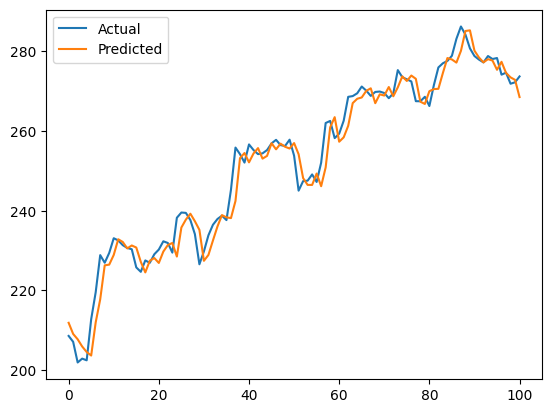

In [17]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, pred))

plt.plot(y_test.values, label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.show()


## Conclusion
- The Linear Regression model predicts short-term stock price reasonably well.  
- Actual vs predicted plot helps visualize model performance.  
- This dataset and model can be used as a simple stock price prediction example.
